SVR SUPPORT VECTOR REGRESSION

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv')
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [2]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [4]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

x = df[["Years of Experience"]].values
y = df[["Salary"]].values

sc_x = StandardScaler()
sc_y = StandardScaler()

x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y)

Flatten y for SVR

In [8]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

Train SVR Model(RBF Kernel)

In [10]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(x_scaled, y_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100)

PREDICTION AND INVERSE SCALING

In [11]:
y_pred_scaled = svr.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))


In [12]:
y_pred_scaled

array([-0.44592988, -0.95928686,  1.16101663, ..., -0.71943669,
        1.02434885, -1.33765207])

In [13]:
y_pred

array([[ 91789.78489284],
       [ 64693.65154467],
       [176608.02755474],
       ...,
       [ 77353.48189214],
       [169394.39541345],
       [ 44722.68696322]])

Visualization Actual vs Predicted

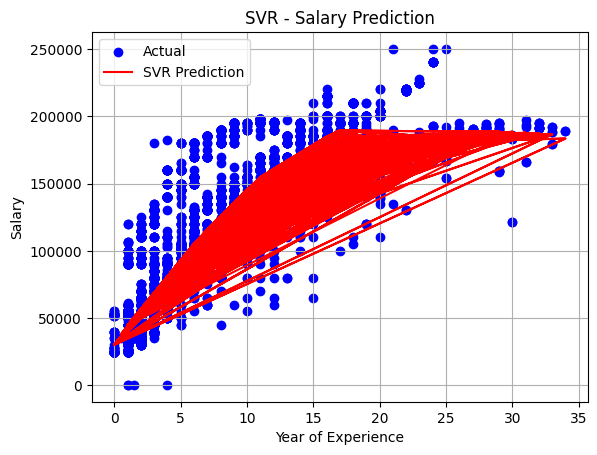

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, y_pred, color='red', label='SVR Prediction')
plt.title("SVR - Salary Prediction")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()

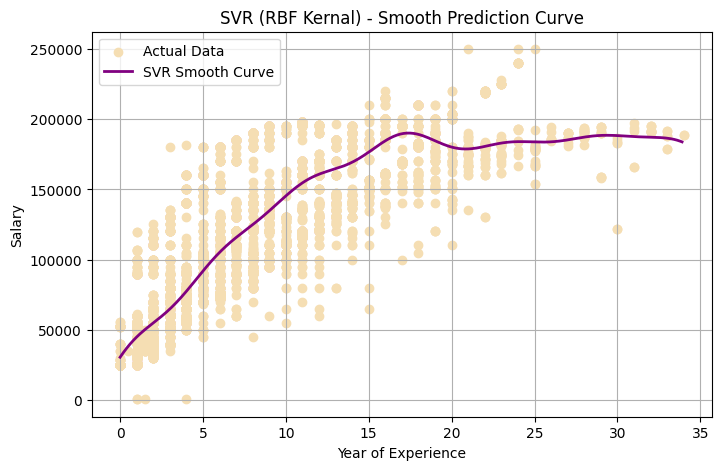

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x_grid = np.arange(min(x.ravel()), max(x.ravel()), 0.1)
x_grid = x_grid.reshape(-1, 1)

x_grid_scaled = sc_x.transform(x_grid)

y_grid_scaled = svr.predict(x_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1, 1))

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='wheat', label='Actual Data')
plt.plot(x_grid, y_grid, label='SVR Smooth Curve', color='purple', linewidth=2)
plt.title("SVR (RBF Kernal) - Smooth Prediction Curve")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()

Evaluate Model Performance

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y,y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 759013901.8514212
RMSE: 27550.20692937571
R2 Score: 0.7275580175081495


Compare Kernals Using Code

Kernel: LINEAR | r*r Score: 0.6326


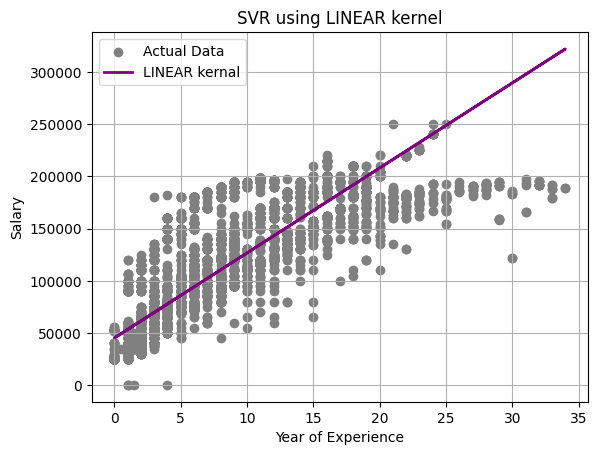

Kernel: POLY | r*r Score: 0.0578


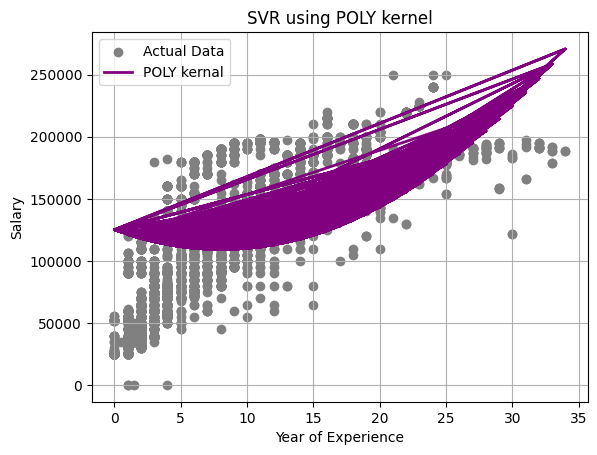

Kernel: RBF | r*r Score: 0.7249


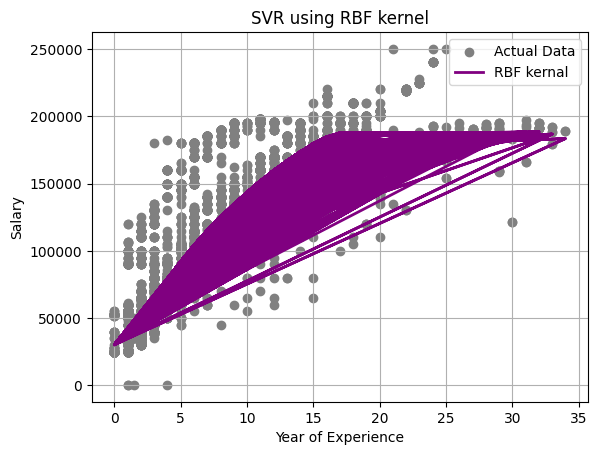

In [28]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

x = df[['Years of Experience']].values
y = df[['Salary']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y).ravel()

kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
  if kernel == 'poly':
    model = SVR(kernel=kernel, degree=2)
  else:
    model = SVR(kernel=kernel)

  model.fit(x_scaled, y_scaled)

  y_pred_scaled = model.predict(x_scaled)
  y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

  score = r2_score(y, y_pred)
  print(f"Kernel: {kernel.upper()} | r*r Score: {score:.4f}")


  plt.scatter(x, y, color='gray', label='Actual Data')
  plt.plot(x, y_pred, label=f'{kernel.upper()} kernal', color='purple', linewidth=2)
  plt.title(f'SVR using {kernel.upper()} kernel')
  plt.xlabel("Year of Experience")
  plt.ylabel("Salary")
  plt.grid(True)
  plt.legend()
  plt.show()


Try Different C and epsilon Values

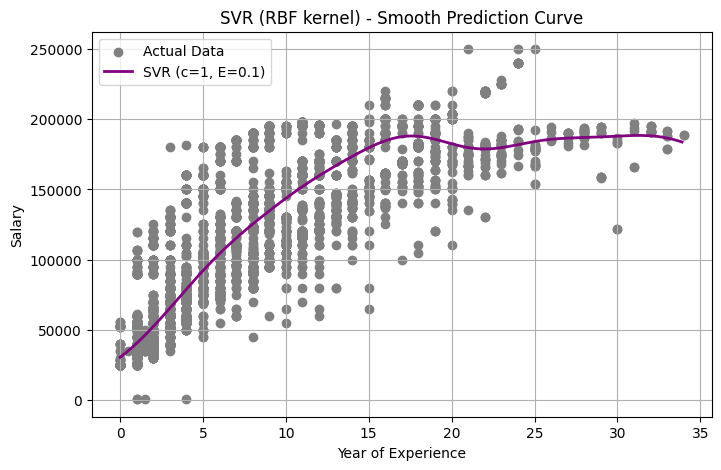

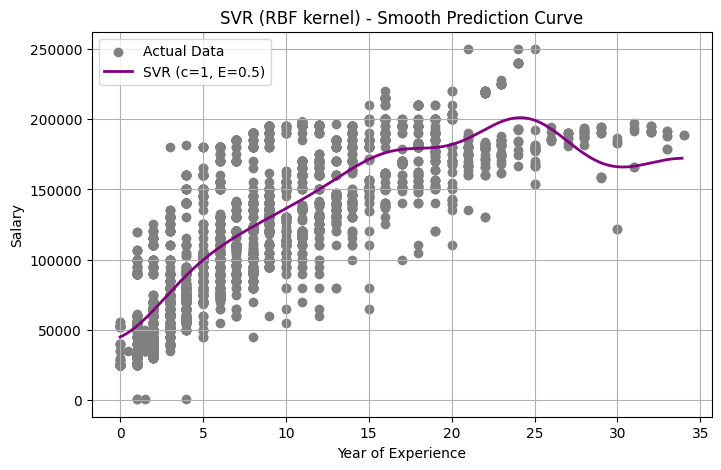

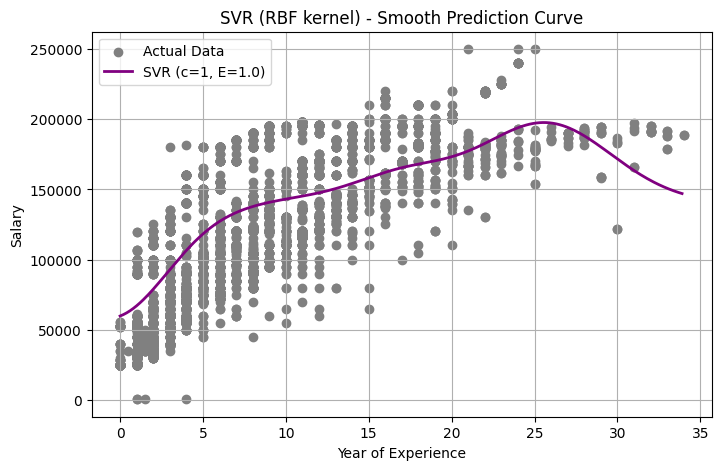

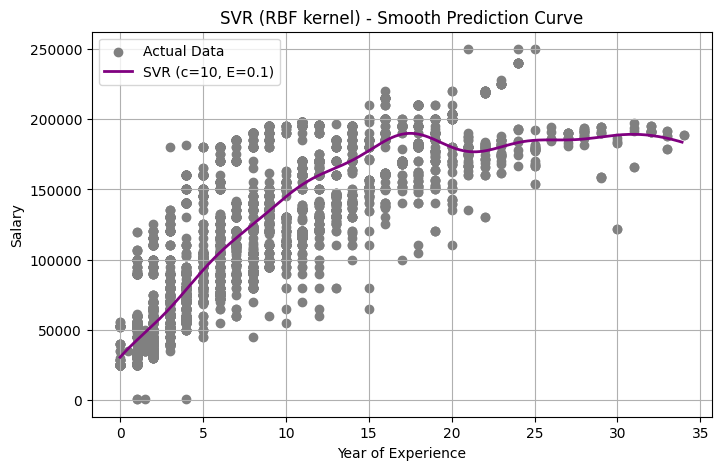

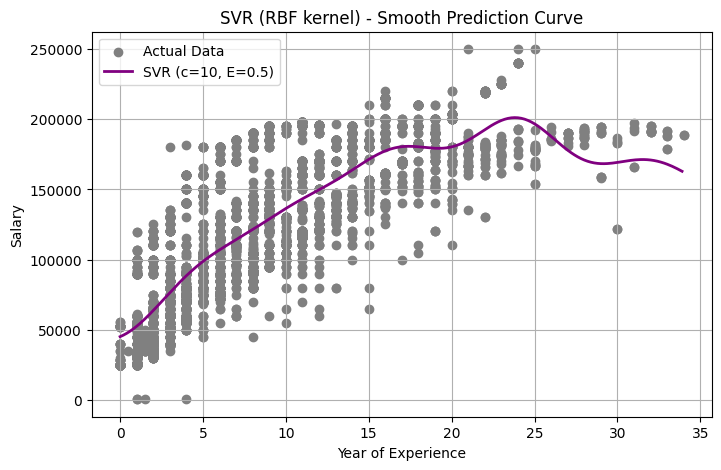

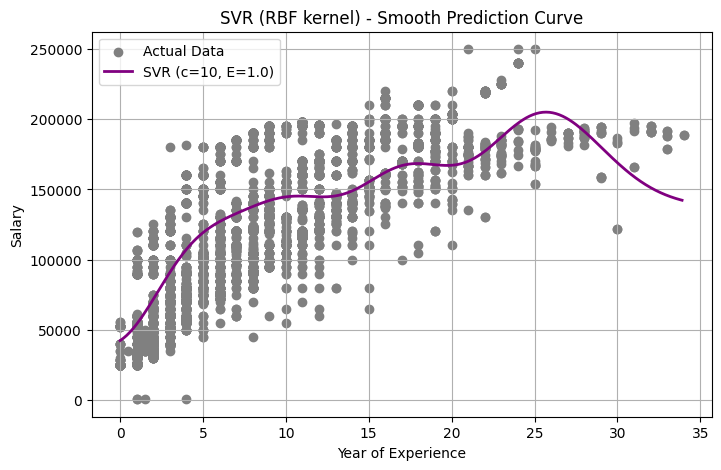

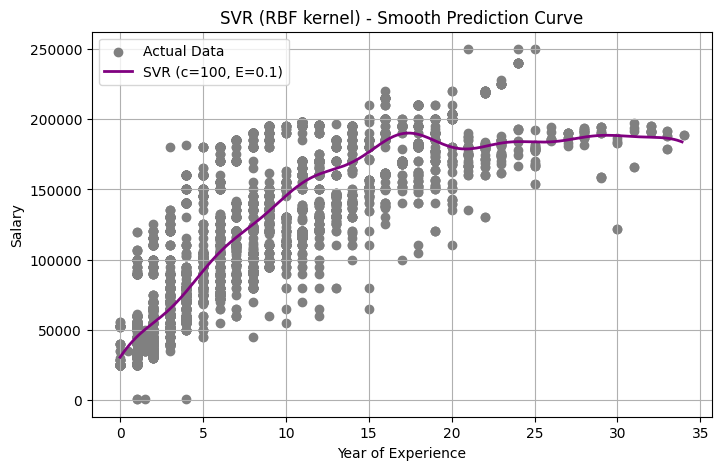

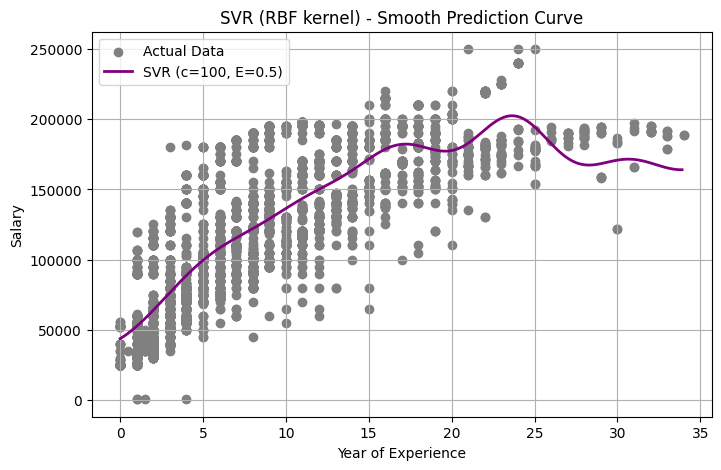

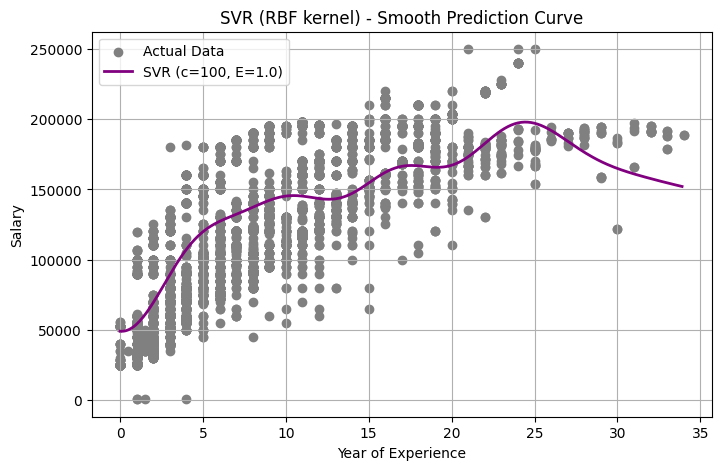

In [32]:
C_values = [1, 10,100]
epsilon_values = [0.1, 0.5, 1.0]

x_grid = np.arange(min(x.ravel()),max(x.ravel()),0.1)
x_grid = x_grid.reshape(-1, 1)

x_grid_scaled = sc_x.transform(x_grid)

for c in C_values:
  for eps in epsilon_values:
    model = SVR(kernel='rbf', C=c, epsilon=eps)
    model.fit(x_scaled, y_scaled)

    y_grid_scaled = model.predict(x_grid_scaled)
    y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1, 1))

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='gray', label='Actual Data')
    plt.plot(x_grid, y_grid, color='purple', label=f'SVR (c={c}, E={eps})', linewidth=2)
    plt.title(f'SVR (RBF kernel) - Smooth Prediction Curve')
    plt.xlabel("Year of Experience")
    plt.ylabel("Salary")
    plt.grid(True)
    plt.legend()
    plt.show()
